In [1]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [3]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

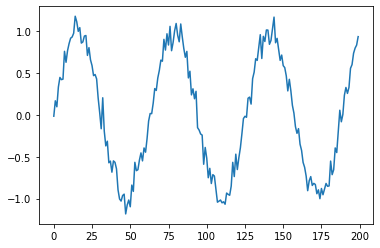

In [22]:
#membuat data 
series = np.sin(0.1*np.arange(200)) + np.random.randn(200) * 0.1

#visualisasi data
plt.plot(series)
plt.show()


In [23]:
# Membuat dataset
T = 10
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape: ", X.shape, "Y.shape", Y.shape)

X.shape:  (190, 10) Y.shape (190,)


In [24]:
### menggunakan model autoregressive
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1),
)

# Training RNN
train = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:])
)

C:\Users\ydhi\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/80
3/3 [==============================] - 1s 112ms/step - loss: 0.9296 - val_loss: 0.3030
Epoch 2/80
3/3 [==============================] - 0s 34ms/step - loss: 0.6098 - val_loss: 0.5717
Epoch 3/80
3/3 [==============================] - 0s 37ms/step - loss: 0.3306 - val_loss: 0.1203
Epoch 4/80
3/3 [==============================] - 0s 46ms/step - loss: 0.1559 - val_loss: 0.2113
Epoch 5/80
3/3 [==============================] - 0s 40ms/step - loss: 0.2617 - val_loss: 0.0788
Epoch 6/80
3/3 [==============================] - 0s 33ms/step - loss: 0.0643 - val_loss: 0.0397
Epoch 7/80
3/3 [==============================] - 0s 33ms/step - loss: 0.1082 - val_loss: 0.0780
Epoch 8/80
3/3 [==============================] - 0s 32ms/step - loss: 0.1027 - val_loss: 0.0286
Epoch 9/80
3/3 [==============================] - 0s 33ms/step - loss: 0.0569 - val_loss: 0.0600
Epoch 10/80
3/3 [==============================] - 0s 36ms/step - loss: 0.0767 - val_loss: 0.0369
Epoch 11/80
3/3 [===========

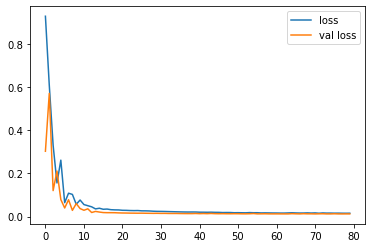

In [25]:
# Visualisasi loss per iterasi
import matplotlib.pyplot as plt
plt.plot(train.history['loss'], label='loss')
plt.plot(train.history['val_loss'], label='val loss')
plt.legend()

In [26]:
# Forecasr menggunakan true target

validation_target = Y[-N//2:]
validation_predictions = []

#index pertama input validasi
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0, 0] # 1x1 array = scalar
    i += 1
    
    #update prediksi
    validation_predictions.append(p)
    

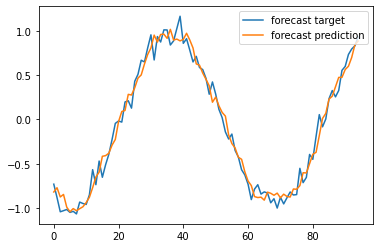

In [27]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [28]:
# Forecasr nilai masa depan (prediksi masa depan)

validation_target = Y[-N//2:]
validation_predictions = []

# input training terakhir
last_x = X[-N//2] #1 Dimensi array dari panjang T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0,0] # 1X1 ARRAY = scalar
    
    #update prediksi
    validation_predictions.append(p)
    
    #membuat input baru
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

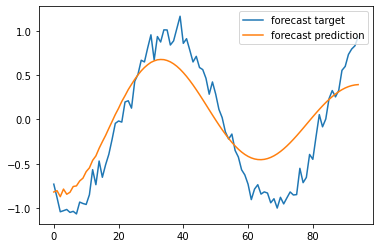

In [29]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()